In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

FileNotFoundError: [Errno 2] No such file or directory: 'hwk3-task1-spills.ipynb'

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

https://github.com/stephenccodes/eds220-hwk3.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?usp=sharing) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

- Delete all the comments initially included in this notebook (ex: `# Your code here`).


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
You can find extra information and metadata for this dataset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 


## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your `git` workflow if you try to push them. Your `data/` directory should not be in your GitHub repository.

## 2. Datasets description
Read the metadata for both datsets and write a description about each one. Indicate the date sources and date of access.


**Spill Incidents**

This dataset contains records of petroleum and other hazardous material spills.

Included is the DEC region and unique seven-digit spill number, program facility name, spill date/time, location, spill source and cause, material(s) and material type spilled, quantity spilled and recovered, units measured, surface water bodies affected, and close date.

Date Accessed: 11/6/24

[https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk/about_data](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk/about_data)

**TIGER Census Bureau shapefile**

The TIGER/Line Shapefiles are extracts of selected geographic and cartographic information from the
Census Bureau's Master Address File (MAF)/Topologically Integrated Geographic Encoding and
Referencing (TIGER) System. The shapefiles include information for the fifty states, the District of
Columbia, Puerto Rico, and the Island Areas (American Samoa, the Commonwealth of the Northern
Mariana Islands, Guam, and the United States Virgin Islands). The shapefiles include polygon boundaries
of geographic areas and features, linear features including roads and hydrography, and point features.
These shapefiles do not contain any sensitive data or confidential data.

Date Accessed: 11/6/24

[https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341)

## Complete Workflow

In [ ]:
#######################

FINISHED WORKFLOW HERE

#######################

## 3. Import libraries

In [1]:
# Import necesasry libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [2]:
# Show the working directory
os.getcwd() 

'/Users/scarroll/MEDS/EDS-220/eds220-hwk3'

In [3]:
# Define the file path using os.path
fp_spills = os.path.join('data', 'Spill_Incidents_20241106.csv')

# Read in the NY spills data
spills = pd.read_csv(fp_spills)

spills


,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553132,400932,`-NYCT,WATER/COENTIS SLIP,NaN,MANHATTAN,New York,NaN,3101,2,04/27/2004,04/27/2004,Equipment Failure,NaN,"Institutional, Educational, Gov., Other",04/29/2004,unknown hazardous material,Hazardous Material,0.0,Pounds,0.0
553133,9904003,`-NYCT,5TH AND WEST 50 ST,NaN,MANHATTAN,New York,NaN,3101,2,07/06/1999,07/06/1999,Housekeeping,NaN,Commercial Vehicle,03/03/2009,diesel,Petroleum,20.0,Gallons,0.0
553134,9213322,`-NYCT / 146 ST,721 LENOX AVE,NaN,MANHATTAN,New York,NaN,3101,2,03/02/1993,03/02/1993,Tank Overfill,NaN,Commercial/Industrial,02/10/2003,#2 fuel oil,Petroleum,200.0,Gallons,0.0
553135,8909580,`-NYCT BUS DEPOT - S I,CASTLETON AVE @ RECTOR ST,NaN,STATEN ISLAND,Richmond,NaN,4301,2,01/05/1990,01/05/1990,Abandoned Drums,NaN,Commercial/Industrial,01/05/1990,unknown petroleum,Petroleum,0.0,NaN,0.0


In [4]:
# File path to counties data
fp_counties = os.path.join('data/tl_2023_us_county/tl_2023_us_county.shp')

# Read in the US counties data
counties = gpd.read_file(fp_counties)
counties.columns = counties.columns.str.lower()  # Simplify column names
counties.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


,statefp,countyfp,countyns,geoid,geoidfq,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head.

b. Check the data types of the columns.

c. Check the unique values in the `material_family` column.

d. Check the unique values in the `county` column.

You can add other cells for preliminary data exploration.

In [5]:
# a. 
# Check the first 5 rows of the spills data frame
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [6]:
# b. 
# Check the data types of the spills data frames
spills.dtypes

Spill Number               int64
Program Facility Name     object
Street 1                  object
Street 2                  object
Locality                  object
County                    object
ZIP Code                  object
SWIS Code                  int64
DEC Region                 int64
Spill Date                object
Received Date             object
Contributing Factor       object
Waterbody                 object
Source                    object
Close Date                object
Material Name             object
Material Family           object
Quantity                 float64
Units                     object
Recovered                float64
dtype: object

In [7]:
# c. 
# Check the unique values of the 'material_family' column
# This exact label is not in the data frame, change the index value to match the actual label
spills['Material Family'].unique() 

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [8]:
# d. 
# Check the unique values of the 'county' column
# This exact label is not in the data frame, change the index value to match the actual label
spills.County.unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans',
       'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung',
       'Seneca', 'Oneida', 'Broome', 'Hamilton', 'Washington', 'Franklin',
       'Columbia', 'Fulton', 'Herkimer', 'Schoharie', 'Rensselaer',
       'Montgomery', 'Putnam', 'Delaware', 'New Jersey - Region 2',
       'Steuben', 'Tioga', 'Chautauqua', 'Cattaraugus', 'Wyoming',
       'Yates', 'Greene', 'Pennsylvania - Region 9', 'Allegany',
       'New Jersey - Region 3 (N)', 'Cattaraugus Indian Reservation',
       'New Jersey - Region 3 (T)', 'Canada - Region 6',
       'Canada - Region 9', 'Pennsyl

In [9]:
# e.
# Check the dimensions of spills
spills.shape

(553137, 20)

In [10]:
# f.
# Check to see how many NA values are in each column
spills.isna().sum()

Spill Number                  0
Program Facility Name         6
Street 1                    132
Street 2                 510137
Locality                   1127
County                        0
ZIP Code                 500071
SWIS Code                     0
DEC Region                    0
Spill Date                  151
Received Date               477
Contributing Factor           0
Waterbody                506233
Source                        0
Close Date                11467
Material Name                 0
Material Family               0
Quantity                      0
Units                    110337
Recovered                     0
dtype: int64

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

<!-- END QUESTION -->

*Your answer here.*

First, we found the first five rows of the spills data frame to get a general sense of what it looked like and which columns were present. Then, we found the data typoes for each individual column, this has a secondary benefit of listing any column names that may have been cut off in our 'head()'. I then found all of the unique bvalues for two columns, 'Material Family' and 'County'. Finally, I  found the dimensions of the data frame and listed the sum of all NA values for each individual column, which may be useful to know during our cleaning phase.

### 5.B. Cleaning
a. Simplify column names as needed.

b. Update column data types as needed. If you're not sure if any data types are needed at this point, you may come back later to this cell.

In [11]:
# a. 
# Simplify column names by making them lowercase and replacing any spaces with underscores
spills.columns = spills.columns.str.lower().str.replace(' ', '_')  

spills.head(3)

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0


In [12]:

# Change the NA values in the 'zip_code' column to a stand in value of 999
spills['zip_code'] = spills['zip_code'].fillna(999)


In [13]:
#spills.zip_code = spills.zip_code.astype(int)

In [14]:
# b. 
# Update the 'zip_code' column to a numeric data type


# Update columns with 'date' to date_time type
# Make a variable with a list of the relevant date columns
date_columns = ['spill_date', 'received_date', 'close_date'] 

# Make a for loop to change the type 
for col in date_columns:
    spills[col] = pd.to_datetime(spills[col])


### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st 2023 (including both dates). Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [15]:
# a.
# Find the range of dates from the 'spill_date' column
print(spills.spill_date.max())
print(spills.spill_date.min())

# Find all the spills observations from January through February 2023
petr_23 = spills[(spills['spill_date'] >= "2023-01-01 00:00:00") & (spills['spill_date'] <= "2023-10-31 00:00:00") & (spills['material_family'] == "Petroleum")]

2024-11-03 00:00:00
1900-01-01 00:00:00


In [16]:
petr_23.head()

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
220,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,diesel,Petroleum,0.0,NaN,0.0
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,#2 fuel oil,Petroleum,0.0,Gallons,0.0
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,gasoline,Petroleum,0.0,NaN,0.0
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,kerosene [#1 fuel oil] (on-site consumption),Petroleum,0.0,NaN,0.0
224,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,"used oil (heating, on-site consumption)",Petroleum,0.0,NaN,0.0


In [17]:
# Check the result
# Find the range of dates from the 'spill_date' column of 'petr_23'
print(petr_23.spill_date.max())
print(petr_23.spill_date.min())

2023-10-31 00:00:00
2023-01-01 00:00:00


<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print messages verifying that `petr_23` only has data for 2023 and from January through October.
HINT: [pandas.Series.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) and [pandas.Series.dt.month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html).

In [18]:
# b.
# Confirm that 'petr_23' only has data for January through October, 2023

# List the unique values of the 'year' column
petr_23_year = petr_23.spill_date.dt.year.unique()

# List the unique values of the month column
petr_23_months = petr_23.spill_date.dt.month.unique()

# Sort the months
petr_23_months.sort() # Modifies in place, so it changes the original data frame

print(f"The data of 'petr_23' contain obseravtions from the months {petr_23_months} of the year {petr_23_year}")

The data of 'petr_23' contain obseravtions from the months [ 1  2  3  4  5  6  7  8  9 10] of the year [2023]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [19]:
# c. 
# Confirm that all observations are Petroleum spills
# Find unique values and make them a list
assert petr_23.material_family.unique().tolist()[0] == "Petroleum" 

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new data frame named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Data frame has two columns only:
    - Column one: county names, column name = `county`
    - Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.


In [20]:
# Make a dataframe with county names and a count of their respective spills
spills_per_county = pd.DataFrame(petr_23.groupby('county') # Select each county
                                 .size() # Find the number of spills
                                 .reset_index()
                                 .rename(columns = {0: "n_spills"})) 
spills_per_county.head(3)

,county,n_spills
0,Albany,205
1,Allegany,30
2,Bronx,143


## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head.

b. Check the data types of the columns.

c. Check the geo-dataframe's CRS.

d. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [21]:
# a. 
# Check the first 5 rows of the counties data frame
counties.head()

,statefp,countyfp,countyns,geoid,geoidfq,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [22]:
# b. 
# Check the data types of the counties data frame
counties.dtypes

statefp       object
countyfp      object
countyns      object
geoid         object
geoidfq       object
name          object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp         object
cbsafp        object
metdivfp      object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [23]:
# c.
# Check the CRS of the counties dataframe
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

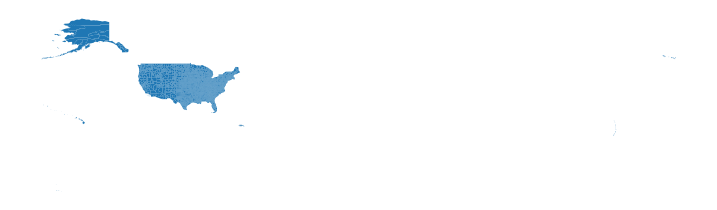

In [24]:
# d. 
# Make quick plot of the 'counties' dataframe
fig, ax = plt.subplots(figsize = (9, 5))
ax.axis('off') # Remove axes for cleaner map
counties.plot(ax = ax)

plt.show()

In [25]:
# e.
# Check the ellipsoid of the 'counties' dataframe
counties.crs.ellipsoid

ELLIPSOID["GRS 1980",6378137,298.257222101,
    LENGTHUNIT["metre",1],
    ID["EPSG",7019]]

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

*Your answer here.*

To explore the dataframe, I checked the first five rows of data with `head()` to get a general sense of what is included. Then, I found the names of each column, and their respective data type with `dtype` so I can manipulate data later. I found the coordinate reference system and ellipsoid of the 'counties' data in preparation of having to join data sets with another geo dataframe. Lastly, i made a rough map with the data to better understand it's extent.


<!-- END QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [26]:
# Column names seem to be in camel  case already
# Run code to simplify them in case we missed something
counties.columns = counties.columns.str.lower().str.replace(' ', '_')  

counties.head(3)

,statefp,countyfp,countyns,geoid,geoidfq,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."


### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them.

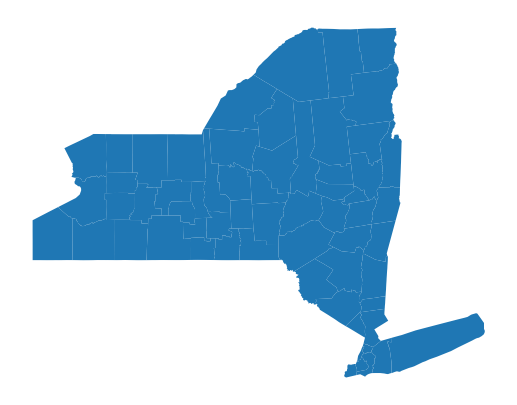

In [27]:
# List all of the counties in New York
# Find the corresponding value for New York(36) in the 'statefp' column by reading metadata
ny_counties = counties[counties.statefp == '36']

# Plot the counties
fig, ax = plt.subplots(figsize = (9, 5))
ax.axis('off') # Remove axes for cleaner map
ny_counties.plot(ax = ax)

plt.show()

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.


In [28]:
# a.
# Find all of the unique values in the 'name' column of the 'ny_counties' data frame
ny_county_names = sorted(ny_counties.name # Sort them alphabetically
                         .unique()
                         )
print(ny_county_names)

['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga', 'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia', 'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin', 'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson', 'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery', 'Nassau', 'New York', 'Niagara', 'Oneida', 'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego', 'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland', 'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca', 'St. Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 'Ulster', 'Warren', 'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates']


In [29]:
# b.
# Find all of the unique values in the 'county' column of the 'spills_per_county' data frame
spills_per_county_names = sorted(spills_per_county.county # Sort them alphabetically
                             .unique()
                             )
print(spills_per_county_names)

['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga', 'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia', 'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin', 'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson', 'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery', 'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida', 'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego', 'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland', 'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca', 'St Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren', 'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates']


**Differences:**
These two lists are different lengths, it appears that they do not contain all of the same vlaues throughout. The 'spills_per_county' data frame has more values listed, and appears to have several sub categories of states, non-states, as well as non-alphanumeric characters and spaces. Further data cleaning is necessary.



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 



In [30]:
diff_names_spills = np.setdiff1d(spills_per_county_names, ny_county_names)
diff_names_spills = diff_names_spills.tolist()
diff_names_spills

['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']


d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [31]:
diff_names_ny = np.setdiff1d(ny_county_names, spills_per_county_names )
diff_names_ny = diff_names_ny.tolist()
diff_names_ny

['St. Lawrence']




e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [32]:
spills_per_county.head(3)

,county,n_spills
0,Albany,205
1,Allegany,30
2,Bronx,143


In [44]:
# e. 
# Filter rows where the county is 'Tuscarora Indian Reservation'
tuscarora_spills = spills_per_county.loc[spills_per_county['county'] == 'Tuscarora Indian Reservation', 'n_spills'].sum()
print("There was", tuscarora_spills, "petroleum spill on the Tuscarora Indian Reservation in 2023.")

There was 1 petroleum spill on the Tuscarora Indian Reservation in 2023.


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and use an `assert` statement to verify that the update was successful.

You may add cells if needed.

In [34]:
# Your code here


### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [35]:
# a. Your code here


In [36]:
# b. Your code here


From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [37]:
# c. Your code here

<!-- BEGIN QUESTION -->

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an [annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) with the data source (New York State Department of Environmental Conservation) and date of access.



In [38]:
# a. Your code here

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Write a figure description for the map, including tha names of the top 3 counties with the most petroleum spills. If you need to do additional data analysis to include relevant information from the data, you may include additional code cells here.

*Your answer here*